# Simpson's Rule Derived

In [2]:
from sympy import init_session
init_session(use_latex="mathjax")

IPython console for SymPy 1.10.1 (Python 3.10.9-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



We want to fit a parabola to 3 points: $(x_0, f_0)$, $(x_1, f_1)$, $(x_2, f_2)$ and then integrate under this fit.  We'll assume that these points are equally spaced.

We'll choose a polynomial of the form:

$$f(x) = a (x - x_0)^2 + b (x - x_0) + c$$

Then evaluating it at the 3 points in our data, we have:

\begin{align*}
f_0 &= c \\
f_1 &= a \Delta x^2 + b\Delta x + c \\
f_2 &= 4 a \Delta x^2 + 2 b \Delta x + c
\end{align*}

This is a linear system that we can solve algebraically

In [3]:
a, b, c = symbols("a b c")
dx = symbols("\Delta{}x")
f0, f1, f2 = symbols("f_0 f_1 f_2")

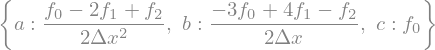

In [5]:
coeffs = solve([Eq(f0, c),
                Eq(f1, a * dx**2 + b * dx + c),
                Eq(f2, 4 * a * dx**2 + 2 * b * dx + c)],
               [a, b, c])
coeffs

This shows that our polynomial is

$$f(x) = \frac{f_0 - 2 f_1 + f_2}{2 \Delta x^2} (x - x_0)^2 
      + \frac{-3 f_0 + 4 f_1 - f_2}{2 \Delta x} (x - x_0) + f_0$$

Now we can integrate under this from $[x_0, x_2]$ (or equivalently $[x_0, x_0 + 2 \Delta x]$

In [8]:
x0 = symbols("x_0")

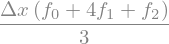

In [10]:
I = integrate(coeffs[a] * (x - x0)**2 + coeffs[b] * (x - x0) + coeffs[c],
              [x, x0, x0+2*dx])
simplify(I)

Compared to the result we got previously for

$$I = \int_a^b f(x) dx \approx \frac{b - a}{6} \left [ f(a) + 4 f\left(\frac{a+b}{2}\right ) + f(b) \right ]$$

we note that these are equivalent, since $b - a = 2 \Delta x$